In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
texts = ['I love deep learning and love AI','Deep learning is amazing','I love AI']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)  # tokenizer物件針對文字進行訓練
sequences = tokenizer.texts_to_sequences(texts)
print('數值序列:', sequences)
word_index = tokenizer.word_index
print('詞彙與索引對照表:', word_index)
print('想要得到一個one hot編碼')
print('得先知道索引值大小')
vocab_size = len(word_index) + 1
print('將序列轉換為向量')
one_hot_results = [to_categorical(seq, num_classes = vocab_size) for seq in sequences]
print(one_hot_results)
print('進一步顯示')
for i, one_hot in enumerate(one_hot_results):
    print(f'句子{i + 1}的one hot編碼:')
    print(one_hot)

數值序列: [[2, 1, 3, 4, 6, 1, 5], [3, 4, 7, 8], [2, 1, 5]]
詞彙與索引對照表: {'love': 1, 'i': 2, 'deep': 3, 'learning': 4, 'ai': 5, 'and': 6, 'is': 7, 'amazing': 8}
想要得到一個one hot編碼
得先知道索引值大小
將序列轉換為向量
[array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]]), array([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]]), array([[0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0.]])]
進一步顯示
句子1的one hot編碼:
[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
texts = ['I love deep learning and love AI','Deep learning is amazing','I love AI']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)  # tokenizer物件針對文字進行訓練
sequences = tokenizer.texts_to_sequences(texts)
print('數值序列:', sequences)
word_index = tokenizer.word_index
print('詞彙與索引對照表:', word_index)
print('想要得到一個one hot編碼')
print('將序列轉換為向量')
one_hot_matrix = tokenizer.texts_to_matrix(texts, mode='binary')
print(one_hot_matrix)

數值序列: [[2, 1, 3, 4, 6, 1, 5], [3, 4, 7, 8], [2, 1, 5]]
詞彙與索引對照表: {'love': 1, 'i': 2, 'deep': 3, 'learning': 4, 'ai': 5, 'and': 6, 'is': 7, 'amazing': 8}
想要得到一個one hot編碼
將序列轉換為向量
[[0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 1.]
 [0. 1. 1. 0. 0. 1. 0. 0. 0.]]


In [3]:
from sklearn.preprocessing import OneHotEncoder
texts_array = np.array(texts).reshape(-1,1)
hot1 = OneHotEncoder(sparse_output = False)
print('必須規劃為DataFrame的資料，不然無法做轉換處理')
hot2 = hot1.fit_transform(np.array(texts).reshape(-1,1))
hot2 = hot1.fit_transform(texts_array)
print(hot2)

必須規劃為DataFrame的資料，不然無法做轉換處理
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.','this document is the second document.','And this is the third one.','Is this the first document?']
vectorizer = CountVectorizer(lowercase = False)
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.toarray())

['And' 'Is' 'This' 'document' 'first' 'is' 'one' 'second' 'the' 'third'
 'this']
[[0 0 1 1 1 1 0 0 1 0 0]
 [0 0 0 2 0 1 0 1 1 0 1]
 [1 0 0 0 0 1 1 0 1 1 1]
 [0 1 0 1 1 0 0 0 1 0 1]]


In [5]:
import jieba
from collections import Counter
texts = ["我愛自然語言處理","機器學習是人工智慧的一部分","資料分析與資料挖掘"]
def segment_texts(texts):
  segment_texts = []
  for text in texts:
    words = list(jieba.cut(text))
    segment_texts.append(words)
  return segment_texts
def generate_ngram(words, n):
  ngram_list = zip(*[words[i:] for i in range(n)])
  ngram_list = [' '.join(ngram) for ngram in ngram_list]
  return ngram_list
def process_texts(texts, n):
  all_ngrams = []
  segmented_texts = segment_texts(texts)
  for words in segmented_texts:
    ngrams = generate_ngram(words,n)
    all_ngrams.extend(ngrams)
  return all_ngrams
n = 3
all_ngrams = process_texts(texts, n)
print('所有字串的', n, '-grams的結果:')
print(all_ngrams)
counter = Counter(all_ngrams)
print('所有字串的', n, '-grams的頻率計算:')
print(counter)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.771 seconds.
DEBUG:jieba:Loading model cost 0.771 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


所有字串的 3 -grams的結果:
['我 愛 自然', '愛 自然 語言', '自然 語言 處理', '機器 學習 是', '學習 是 人工智慧', '是 人工智慧 的', '人工智慧 的 一部分', '資料 分析 與', '分析 與 資料', '與 資料 挖掘']
所有字串的 3 -grams的頻率計算:
Counter({'我 愛 自然': 1, '愛 自然 語言': 1, '自然 語言 處理': 1, '機器 學習 是': 1, '學習 是 人工智慧': 1, '是 人工智慧 的': 1, '人工智慧 的 一部分': 1, '資料 分析 與': 1, '分析 與 資料': 1, '與 資料 挖掘': 1})


In [6]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [7]:
import jieba
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
data = []
with open("/content/drive/MyDrive/Colab第三階段202505/ch12_20250708/data_source.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line.endswith(","):
            line = line[:-1]  # 去掉行尾的逗號
        if line:
            tup = eval(line)
            data.append(tup)
print(data)
print('分類結果與分類的資料都是文字，全部都要轉換為數字嗎?')
print('依照資料來做評估，如果不需要做one hot轉換，不需要轉換為數字')
print('可評估詞彙的重要性來進行sklearn分類，但是如果字串太多或程式執行緩慢，請改用神經網路方式進行')
texts, labels = zip(*data)  # 將data資料拆解分別儲存至texts與labels
def chinese_tokenizer(text):
    return jieba.lcut(text)
pipeline = Pipeline([('vectorizer', TfidfVectorizer(tokenizer = chinese_tokenizer, ngram_range = (1,4))), ('classifier', MultinomialNB())])
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size = 0.2, random_state = 42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('預測結果:')
print(y_pred)
print('實際結果:')
print(y_test)
print('準確率:')
print(accuracy_score(y_test, y_pred))
print('詳細分類報告:')
print(classification_report(y_test, y_pred))
new_text = ['量子運算是未來的趨勢']
predicted1 = pipeline.predict(new_text)
print('預測結果:')
print(predicted1)

[('喬科維奇溫網99勝到手 衛冕冠軍卡雷茨科娃鏖戰晉級', '運動'), ('吳詩儀碾壓對手 WB盃哈薩克拳賽晉4強保底銅牌', '運動'), ('瓊斯盃台灣女籃不敵世大運女籃 陳薇安：虛心檢討', '運動'), ('世大運女籃培訓隊防守建功 瓊斯盃驚險扳倒台灣隊', '運動'), ('謝淑薇攜拉脫維亞搭檔 溫網女雙闖頭關', '運動'), ('利物浦球星裘達車禍身亡 C羅：這沒道理', '運動'), ('對手又抱又摔卻獲勝 WB盃哈薩克賽黃筱雯8強敗', '運動'), ('中職下半季4日開打 龍隊推徐若熙先發對獅隊', '運動'), ('味全龍劉家豪率捕手群做公益 送暖喜憨兒基金會', '運動'), ('利物浦足球球星裘達車禍身亡 上個月剛為葡萄牙歐國聯摘冠', '運動'), ('114年體育推手獎受理推薦 盼更多企業贊助', '運動'), ('LLB亞太區少棒賽 北市東園國小擊敗韓國奪冠', '運動'), ('LLB亞太區次青少棒賽 台中中山奪冠出征世界賽', '運動'), ('道奇柯蕭達3000K里程碑 MLB史上第20人、左投第4人', '運動'), ('NBA獨行俠與狀元佛萊格簽4年約 傳控衛艾克森回歸', '運動'), ('鄧愷威3A先發5局無失分 飆近2季新高11K奪勝投', '運動'), ('林維恩中繼3局好投獲高A首勝 陳柏毓先發奪勝', '運動'), ('獅隊再補新韓援安惠志 與文慧真趙娟週組韓籍3本柱', '運動'), ('世界自由潛水泳池錦標賽 台灣獲3金1銀3銅', '運動'), ('道奇巨投柯蕭3000K達陣 大聯盟史上第20人', '運動'), ('Google AI創作工具登台 一句話生成微距珍奶影片', '科技'), ('智利ALMA望遠鏡拍到宇宙初期元素影像 可研究恆星如何誕生', '科技'), ('甲烷衛星迷失太空 貝佐斯贊助溫室氣排追蹤計畫受挫', '科技'), ('OpenAI：未計劃用Google自製AI晶片TPU', '科技'), ('Netflix攜手NASA 火箭升空太空任務盡情看', '科技'), ('都市也能種菜 新加坡室內農場翻轉糧食安全想像', '科技'), ('AI淨零／AI好夯掀散熱戰 其陽雙相液冷衝刺節能減碳', '科技'), ('法國挪威簽跨境碳封存協議 助歐洲打造統一CCS市場', '科技'), 

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [8]:
!pip install jieba scikit-learn

['"喬科維奇溫網99勝到手 衛冕冠軍卡雷茨科娃鏖戰晉級"', '"吳詩儀碾壓對手 WB盃哈薩克拳賽晉4強保底銅牌"', '"瓊斯盃台灣女籃不敵世大運女籃 陳薇安：虛心檢討"', '"世大運女籃培訓隊防守建功 瓊斯盃驚險扳倒台灣隊"', '"謝淑薇攜拉脫維亞搭檔 溫網女雙闖頭關"', '"利物浦球星裘達車禍身亡 C羅：這沒道理"', '"對手又抱又摔卻獲勝 WB盃哈薩克賽黃筱雯8強敗"', '"中職下半季4日開打 龍隊推徐若熙先發對獅隊"', '"味全龍劉家豪率捕手群做公益 送暖喜憨兒基金會"', '"利物浦足球球星裘達車禍身亡 上個月剛為葡萄牙歐國聯摘冠"', '"114年體育推手獎受理推薦 盼更多企業贊助"', '"LLB亞太區少棒賽 北市東園國小擊敗韓國奪冠"', '"LLB亞太區次青少棒賽 台中中山奪冠出征世界賽"', '"道奇柯蕭達3000K里程碑 MLB史上第20人、左投第4人"', '"NBA獨行俠與狀元佛萊格簽4年約 傳控衛艾克森回歸"', '"鄧愷威3A先發5局無失分 飆近2季新高11K奪勝投"', '"林維恩中繼3局好投獲高A首勝 陳柏毓先發奪勝"', '"獅隊再補新韓援安惠志 與文慧真趙娟週組韓籍3本柱"', '"世界自由潛水泳池錦標賽 台灣獲3金1銀3銅"', '"道奇巨投柯蕭3000K達陣 大聯盟史上第20人"', '"Google AI創作工具登台 一句話生成微距珍奶影片"', '"智利ALMA望遠鏡拍到宇宙初期元素影像 可研究恆星如何誕生"', '"甲烷衛星迷失太空 貝佐斯贊助溫室氣排追蹤計畫受挫"', '"OpenAI：未計劃用Google自製AI晶片TPU"', '"Netflix攜手NASA 火箭升空太空任務盡情看"', '"都市也能種菜 新加坡室內農場翻轉糧食安全想像"', '"AI淨零／AI好夯掀散熱戰 其陽雙相液冷衝刺節能減碳"', '"法國挪威簽跨境碳封存協議 助歐洲打造統一CCS市場"', '"分析師：蘋果押寶頭戴裝置 至少7專案開發中"', '"日本H2A火箭最後一次發射 送氣候觀測衛星入軌道"', '"AI為達成目的學會扯謊甚至威脅創作者 專家示警"', '"孫正義：軟銀目標10年內成為超級AI平台最大供應商"', '"公理4號任務對接國際太空站 將進行約60項實驗"', '"輝達股價創新高 黃仁勳：機器人是潛在成長

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0 "喬科維奇溫網99勝到手 衛冕冠軍卡雷茨科娃鏖戰晉級" -0.038641225024808254 -0.003938001477430599
1 "吳詩儀碾壓對手 WB盃哈薩克拳賽晉4強保底銅牌" -0.03885056866488279 -0.029487066136016267
2 "瓊斯盃台灣女籃不敵世大運女籃 陳薇安：虛心檢討" -0.02065557080359135 -0.03106754963424956
3 "世大運女籃培訓隊防守建功 瓊斯盃驚險扳倒台灣隊" -0.02712709924203235 -0.02626593888239779
4 "謝淑薇攜拉脫維亞搭檔 溫網女雙闖頭關" -0.04073139459221022 -0.03950795403632138
5 "利物浦球星裘達車禍身亡 C羅：這沒道理" -0.0646675410243915 -0.019751587816189076
6 "對手又抱又摔卻獲勝 WB盃哈薩克賽黃筱雯8強敗" -0.031124402683740386 -0.04058171605621998
7 "中職下半季4日開打 龍隊推徐若熙先發對獅隊" -0.02421040013418231 -0.0009079856154069753
8 "味全龍劉家豪率捕手群做公益 送暖喜憨兒基金會" -0.036545129198040774 -0.001274387645019187
9 "利物浦足球球星裘達車禍身亡 上個月剛為葡萄牙歐國聯摘冠" -0.07141039580995995 -0.017117063134480234
10 "114年體育推手獎受理推薦 盼更多企業贊助" -0.020248684145598956 -0.03306410853471059
11 "LLB亞太區少棒賽 北市東園國小擊敗韓國奪冠" -0.058590790503237705 -0.04368930478595825
12 "LLB亞太區次青少棒賽 台中中山奪冠出征世界賽" -0.06545252834969864 -0.0513273884155365
13 "道奇柯蕭達3000K里程碑 MLB史上第20人、左投第4人" -0.07383599187326328 -0.03790463661464156
14 "NBA獨行

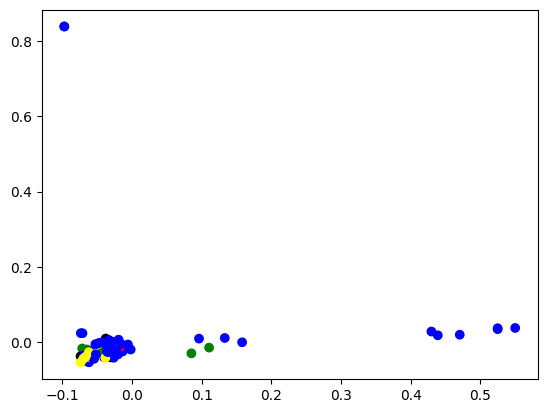

In [9]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
texts = []
with open("/content/drive/MyDrive/Colab第三階段202505/ch12_20250708/data_source2.txt", "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        texts.append(line)
print(texts)
def chinese_tokenizer(text):
    return jieba.lcut(text)
vectorizer = TfidfVectorizer(tokenizer = chinese_tokenizer, ngram_range = (1,2))
X = vectorizer.fit_transform(texts)
num_clusters = 5
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
kmeans.fit(X)
labels = kmeans.labels_
for i, label in enumerate(labels):
    print("字串:", texts[i], "=> 分群:", label)
pca = PCA(n_components = 2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = ["red","blue","green","yellow","black"]
x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
fig, ax = plt.subplots()
ax.scatter(x_axis, y_axis, c = [colors[d] for d in labels])
for i, txt in enumerate(texts):
  print(i, txt, x_axis[i], y_axis[i])
plt.show()